In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
X_train

,User ID,Gender,Age,EstimatedSalary
157,15602373,Male,29,75000
109,15697997,Female,38,80000
17,15617482,Male,45,26000
347,15768151,Female,54,108000
24,15705113,Male,46,23000
...,...,...,...,...
71,15726358,Female,24,27000
106,15706185,Female,26,35000
270,15680752,Female,43,133000
348,15579212,Male,39,77000


In [6]:
y_train

157    0
109    0
17     1
347    1
24     1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 280, dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

X_train_Gender = ohe.fit_transform(X_train[['Gender']])
X_test_Gender = ohe.fit_transform(X_test[['Gender']])

In [8]:
X_train = X_train.drop(['Gender'], axis = 1)

In [9]:
X_test = X_test.drop(['Gender'], axis = 1)

In [10]:
X_train_Gender = pd.DataFrame(X_train_Gender.toarray(), columns=ohe.get_feature_names_out(['Gender']))
X_test_Gender = pd.DataFrame(X_test_Gender.toarray(), columns= ohe.get_feature_names_out(['Gender']))

In [11]:
X_train_Gender

,Gender_Male
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
275,0.0
276,0.0
277,0.0
278,1.0


In [13]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop= True)

In [14]:
X_train = pd.concat([X_train, X_train_Gender],axis = 1)
X_train

,User ID,Age,EstimatedSalary,Gender_Male
0,15602373,29,75000,1.0
1,15697997,38,80000,0.0
2,15617482,45,26000,1.0
3,15768151,54,108000,0.0
4,15705113,46,23000,1.0
...,...,...,...,...
275,15726358,24,27000,0.0
276,15706185,26,35000,0.0
277,15680752,43,133000,0.0
278,15579212,39,77000,1.0


In [15]:
X_test = pd.concat([X_test, X_test_Gender], axis = 1)
X_test

,User ID,Age,EstimatedSalary,Gender_Male
0,15697424,46,22000,0.0
1,15609669,59,88000,0.0
2,15776733,28,44000,0.0
3,15724536,48,96000,0.0
4,15699284,29,28000,0.0
...,...,...,...,...
115,15814004,27,20000,1.0
116,15655123,26,17000,0.0
117,15734161,37,93000,0.0
118,15787550,42,54000,1.0


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [18]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate(true, pred):
    cm = confusion_matrix(true, pred)
    ConfusionMatrixDisplay(cm, display_labels=['Not Purchased', 'Purchased']).plot()
    tn, fp, fn, tp = cm.ravel()

    print(f"True Positive: {tp}\nTrue Negative: {tn}\nTrue Positive: {fp}\nFalse Negative: {fn}")

    print(f"Precision: {tp / (tp + fp)}\nRecall: {tp / (tp + fn)}")

Accuracy:  0.85  Error Rate:  0.15000000000000002
True Positive: 31
True Negative: 71
True Positive: 2
False Negative: 16
Precision: 0.9393939393939394
Recall: 0.6595744680851063


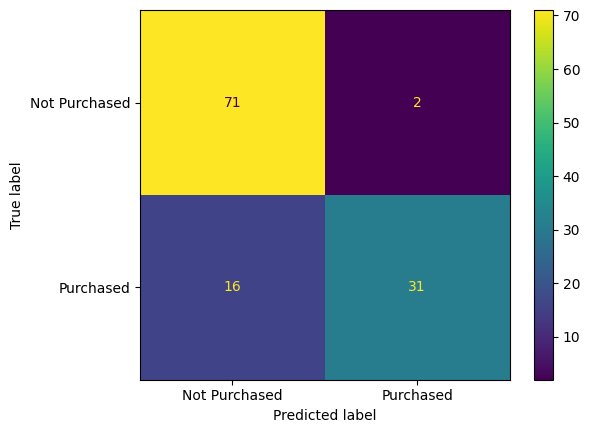

In [20]:
print("Accuracy: ", lr.score(X_test, y_test), ' Error Rate: ', 1 - lr.score(X_test, y_test))
evaluate(y_test, lr.predict(X_test))